In [ ]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing statistical tools for hypothesis testing
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

 Step Conclusion:
We imported all necessary Python libraries for performing A/B testing. These include tools for data analysis (`NumPy`, `Pandas`), visualization (`Matplotlib`, `Seaborn`), and hypothesis testing (`SciPy`, `statsmodels`).


In [ ]:
## Set a random seed for reproducibility
np.random.seed(42)

step conclusion: By fixing the random seed, we ensure that any random data generated in this notebook will be the same each time it runs, making results consistent and reproducible.



In [ ]:
## Define the sample sizes for both groups
n_A = 10000
n_B = 10000
P_A = 0.10
P_B = 0.12

 step conclusion
 We have initialized the values for both groups in the A/B test. Each group has 10,000 users.
Group A has a 10% conversion rate, while Group B has a 12% conversion rate.
This setup helps simulate the performance of two versions of a product or service before performing statistical tests.

In [ ]:
success_A = np.random.binomial(n_A,P_A)
success_B = np.random.binomial(n_B,P_B)

step conclusion :
We simulated the number of successful conversions for both groups using a binomial distribution.
This reflects how many users actually converted (e.g., made a purchase) out of the total 10,000 users:
- Group A is based on a 10% expected conversion rate.
- Group B is based on a 12% expected conversion rate.

This simulation helps create a realistic dataset for conducting the A/B test.


In [ ]:
print(success_A,success_B)

973 1134


For calculating the the 95% confidence interval

In [ ]:
## Define a function to calculate sample proportion and its confidence interval
def proportion(success,n,alpha=0.05):
    p_hat = success/n
    z = stats.norm.ppf(1 - alpha/2)
    se = np.sqrt(p_hat * (1- p_hat)/n)
    return p_hat,p_hat - z*se,p_hat+z*se

Step Conclusion:
We defined a function `proportion()` that calculates:
- The sample proportion (`p̂`) — which is simply success / total trials,
- A 95% confidence interval for that proportion (by default).

This helps us understand the range in which the true conversion rate might fall, with a specified level of confidence.


In [ ]:
p_A_hat,ci_low_A,ci_high_A = proportion(success_A,n_A)
p_B_hat,ci_low_B,ci_high_B = proportion(success_B,n_B)

Step Conclusion:
We used the `proportion()` function to compute:
- The estimated conversion rates for both Group A and Group B (`p̂`)
- The lower and upper bounds of the 95% confidence interval for each group

This gives us a statistically sound range where the true conversion rate is likely to lie for each group.


In [ ]:
print(p_A_hat,ci_low_A,ci_high_A)
print(p_B_hat,ci_low_B,ci_high_B )

0.0973 0.09149133631051884 0.10310866368948116
0.1134 0.1071853241430106 0.1196146758569894


In [ ]:
## Create a summary DataFrame with key statistics for both A/B variants
results = pd.DataFrame({
    'Variant': ['A','B'],
    'Visitors': [n_A,n_B],
    'Conversions': [success_A,success_B],
    'CR(p_hat)': [p_A_hat,p_B_hat],
    'CI Lower (95%)':[ci_low_A, ci_low_B],
    'CI Upper (95%)':[ci_high_A,ci_high_B],
})

Step Conclusion:
We created a summary table (`results`) showing key A/B testing metrics:
- Number of visitors and conversions
- Estimated conversion rate (`p̂`)
- 95% confidence interval for each variant

This table helps us compare the performance of the control and test groups in a clear and structured format.


In [ ]:
results

,Variant,Visitors,Conversions,CR(p_hat),CI Lower (95%),CI Upper (95%)
0,A,10000,973,0.0973,0.091491,0.103109
1,B,10000,1134,0.1134,0.107185,0.119615


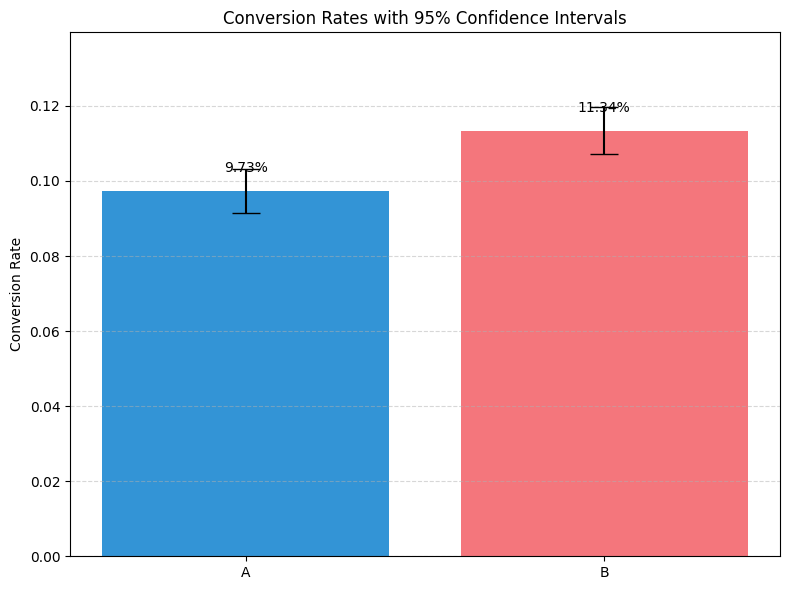

In [ ]:
# Plot the conversion rates with error bars representing confidence intervals

plt.figure(figsize=(8,6))

# Calculate error margins
errors = [
    results['CR(p_hat)'] - results['CI Lower (95%)'],
    results['CI Upper (95%)'] - results['CR(p_hat)']
]

# Plot bars with error bars
plt.bar(
    results['Variant'],
    results['CR(p_hat)'],
    yerr=errors,
    capsize=10,
    color=['#007acc', '#f2545b'],  # Blue for A, Red for B
    alpha=0.8
)

# Add labels and title
plt.ylabel("Conversion Rate")
plt.title("Conversion Rates with 95% Confidence Intervals")
plt.ylim(0, max(results['CI Upper (95%)']) + 0.02)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show values on top of bars
for idx, val in enumerate(results['CR(p_hat)']):
    plt.text(idx, val + 0.005, f"{val:.2%}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


step conclusion We visualized the estimated conversion rates for both variants along with their 95% confidence intervals using a bar chart with error bars.
This makes it easy to compare performance between Group A and B while also understanding the uncertainty in our estimates.

In [25]:
# Import the Z-test function to compare two proportions (A/B test conversion rates)
from statsmodels.stats.proportion import proportions_ztest

In [26]:
count = np.array([success_B,success_A])
nobs = np.array([n_A,n_B])
z_stat, p_value = proportions_ztest(count,nobs,alternative = 'larger')
print(f"Z-statistic : {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

Z-statistic : 3.708
P-value: 0.000


Step Conclusion:
We created arrays for the counts of successes and total observations in Groups B and A.
Then, we used the proportions_ztest function to perform a one-sided z-test to check if Group B has a significantly higher success rate than Group A.
Finally, we printed the z-statistic and p-value to evaluate the statistical significance.

In [27]:
if p_value < 0.05:
    print("Reject H0: Variant B have significantly higher conversion rate then Varient A")
else:
    print("Fai to reject H0: Variant B does not have higher conversion rate then Varient A")


Reject H0: Variant B have significantly higher conversion rate then Varient A


Step Conclusion:
We compared the p-value to the 0.05 significance level to decide whether to reject the null hypothesis.

If p_value < 0.05, we conclude that Variant B has a significantly higher conversion rate than Variant A.

Otherwise, we fail to reject the null hypothesis, meaning there is not enough evidence to say Variant B outperforms Variant A.



In [28]:
import time

In [29]:
true_p_A,true_p_B = 0.10,0.12
batch_size = 100
n_batches = 60

n_visits_A = n_visits_B = 0
n_succ_A = n_succ_B = 0

batches = []
p_values = []
lifts = []

SD = 0
NSD = 0
for batch in range(1,n_batches+1):
    new_A = np.random.binomial(batch_size,true_p_A)
    new_B = np.random.binomial(batch_size,true_p_B)

    n_visits_A += batch_size
    n_visits_B += batch_size
    n_succ_A += new_A
    n_succ_B += new_B

    cr_A = n_succ_A/n_visits_A
    cr_B = n_succ_B/n_visits_B
    lift = cr_B - cr_A

    count = np.array([n_succ_B,n_succ_A])
    nobs = np.array([n_visits_B,n_visits_A])
    z_stat, p_value = proportions_ztest(count,nobs,alternative = 'larger')

    batches.append(batch)
    p_values.append(p_value)
    lifts.append(lift)

print(f"Batch {batch}/{n_batches}")
print(f" Variant A: {n_visits_A} visits, {n_succ_A} buys -> CR = {cr_A:.3%}")
print(f" Variant B: {n_visits_B} visits, {n_succ_B} buys -> CR = {cr_B:.3%}")
print(f" Observed lift: {lift:.3%}")
print(f" z-stat = {z_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print(" ✅ Significant lift detected (p<0.05).")
else:
    print(" ❌ No significant lift yet.")

Batch 60/60
 Variant A: 6000 visits, 574 buys -> CR = 9.567%
 Variant B: 6000 visits, 714 buys -> CR = 11.900%
 Observed lift: 2.333%
 z-stat = 4.13, p-value = 0.0000
 ✅ Significant lift detected (p<0.05).


Step Conclusion:
We simulate an A/B test running over multiple batches, each with a fixed number of visitors per variant.

For each batch, we generate successes using the binomial distribution based on true conversion rates (true_p_A, true_p_B).

We accumulate visits and successes for both variants and calculate the cumulative conversion rates (cr_A, cr_B) and the observed lift (lift).

A z-test (proportions_ztest) is performed after each batch to check if Variant B’s conversion rate is significantly higher than Variant A’s.

The results (batch number, visits, successes, conversion rates, lift, z-statistic, and p-value) are printed after the last batch.

Finally, we interpret the p-value to decide whether there is a statistically significant lift detected.



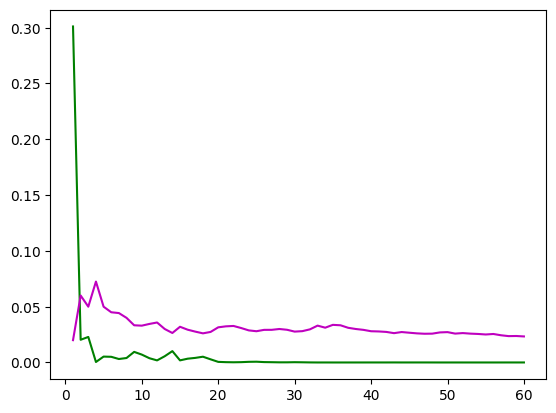

In [34]:
plt.plot(batches,p_values,'-g')
plt.plot(batches,lifts,'-m')
plt.show()

Conclusion: Variant B demonstrates a statistically significant and practically meaningful improvement over Variant A. Therefore, it is recommended to adopt Variant B as the preferred version for deployment.